# Breast Cancer Prediction

# ----------------------------- IMPORTING LIBRARIES AND DATA------------------------------

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm

from matplotlib.colors import ListedColormap
from statsmodels.formula.api import ols, logit
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report

**Descriptions:**

Since the analysis we have done here is classification, it would not be appropriate to build a Linear Regression model or create an Anova table. That's why we built Logistic Regression, SVM, Naive Bayes and KNN models. And we tested these models with values like F1 score, accuracy score, or precision score.

In [49]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [50]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [51]:
liste = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size','Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
data.columns = liste
data.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [52]:
data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [54]:
data[data['Bare Nuclei']=='?']

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [55]:
data.drop(data[data['Bare Nuclei']=='?'].index, inplace=True)
data.index = range(len(data))
data['Bare Nuclei'] = data['Bare Nuclei'].astype(str).astype(np.int64)

In [56]:
data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


# ----------------------------- EDA(Exploratory Data Analysis)------------------------------

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [58]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [59]:
#Use corr() function to find the correlation among the columns in the Dataframe 
data.corr

<bound method DataFrame.corr of      Sample code number  Clump Thickness  Uniformity of Cell Size  \
0               1000025                5                        1   
1               1002945                5                        4   
2               1015425                3                        1   
3               1016277                6                        8   
4               1017023                4                        1   
..                  ...              ...                      ...   
678              776715                3                        1   
679              841769                2                        1   
680              888820                5                       10   
681              897471                4                        8   
682              897471                4                        8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           1                  1          

In [60]:
data["Class"].unique()

array([2, 4], dtype=int64)

In [61]:
data['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [62]:
data.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [63]:
data.corr().abs().sort_values("Class")["Class"]

Sample code number             0.084701
Mitoses                        0.423448
Single Epithelial Cell Size    0.690958
Marginal Adhesion              0.706294
Clump Thickness                0.714790
Normal Nucleoli                0.718677
Bland Chromatin                0.758228
Uniformity of Cell Size        0.820801
Uniformity of Cell Shape       0.821891
Bare Nuclei                    0.822696
Class                          1.000000
Name: Class, dtype: float64

In [64]:
for i,j in data.iterrows():
    if data.loc[i,'Class'] == 2 or data.loc[i,'Class'] == 0:
        data.loc[i,'Class'] = 0
    else: #data.loc[i,'Class'] == 4:
        data.loc[i,'Class'] = 1

In [65]:
data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,0
679,841769,2,1,1,1,2,1,1,1,1,0
680,888820,5,10,10,3,7,3,8,10,2,1
681,897471,4,8,6,4,3,4,10,6,1,1


# --------------------------------------- DATA VISUALIZATION --------------------------------------

C:\Users\sarif\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

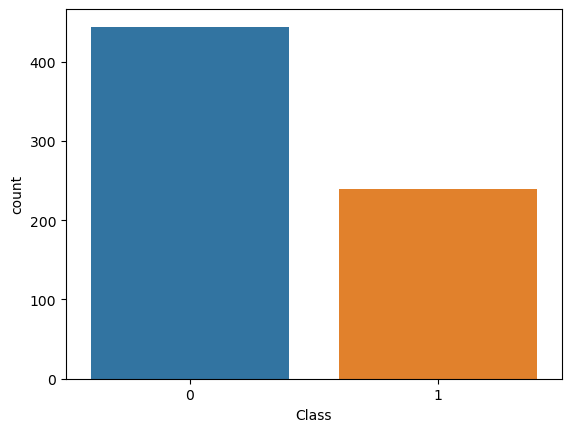

In [66]:
sns.countplot(data["Class"])

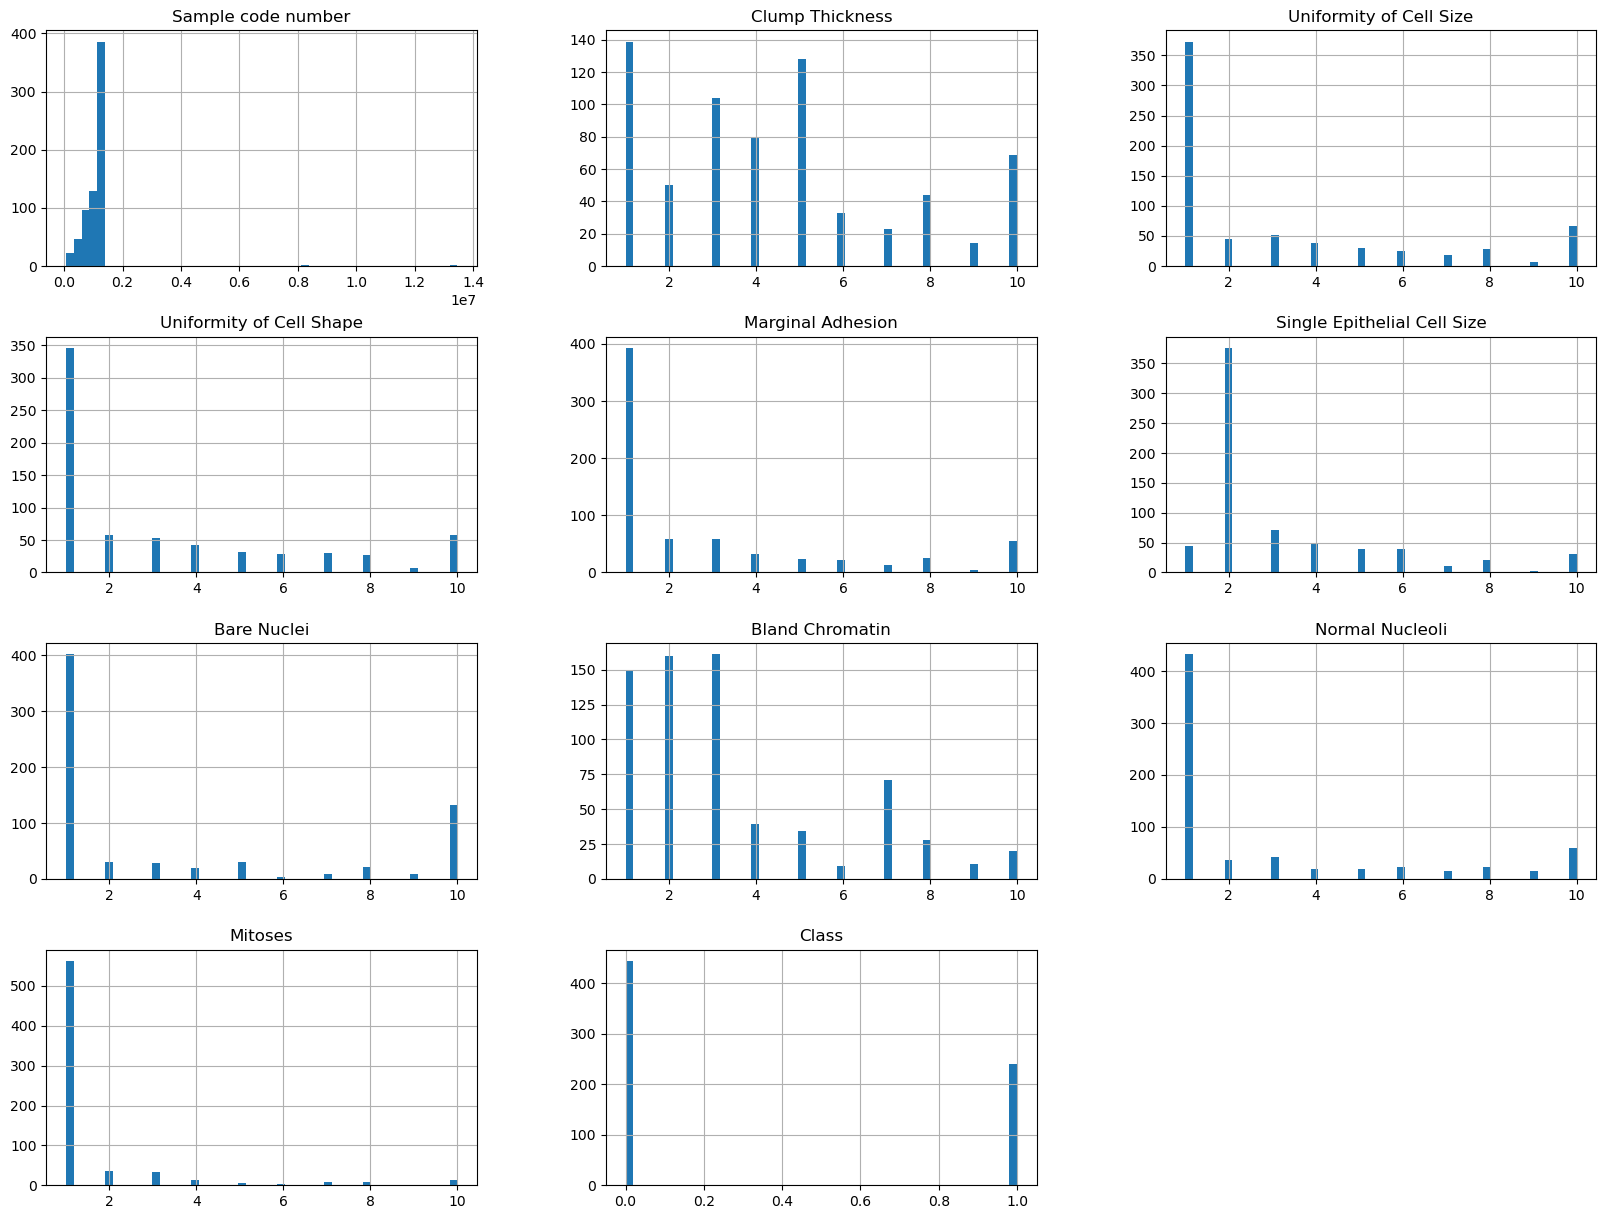

In [67]:
import matplotlib.pyplot as plt 
data.hist(bins=50, figsize=(20,15))
plt.show()

**Comments:**

When the histagrams of "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Bare Nuclei", and "Normal Nucleoli" are examined, their distribution within themselves is similar. This may be an indication that there may be a correlation between them. But of course we can't be sure. We can see if there is a relationship between them by drawing scatter or heat map graphs.

In addition, some properties of cells have common values. For example, when we look at the Mitosis value, we see that the cells with a value of 1 are superior in number.

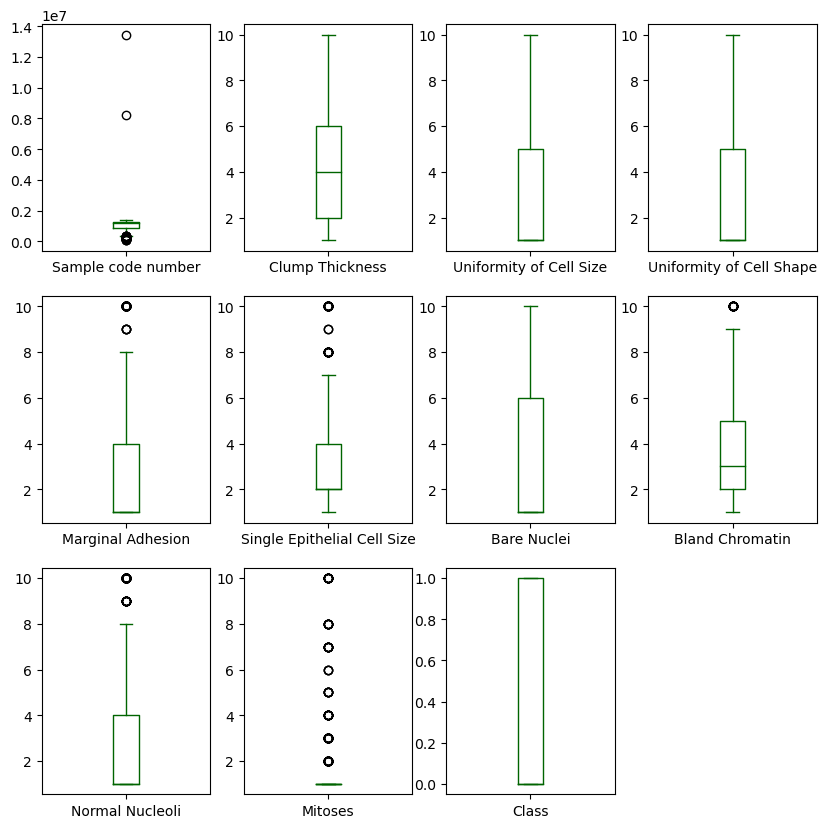

In [68]:
data.plot(kind='box', subplots=True, layout=(3,4),
sharex=False,sharey=False, figsize=(10,10), 
color='DarkGreen');

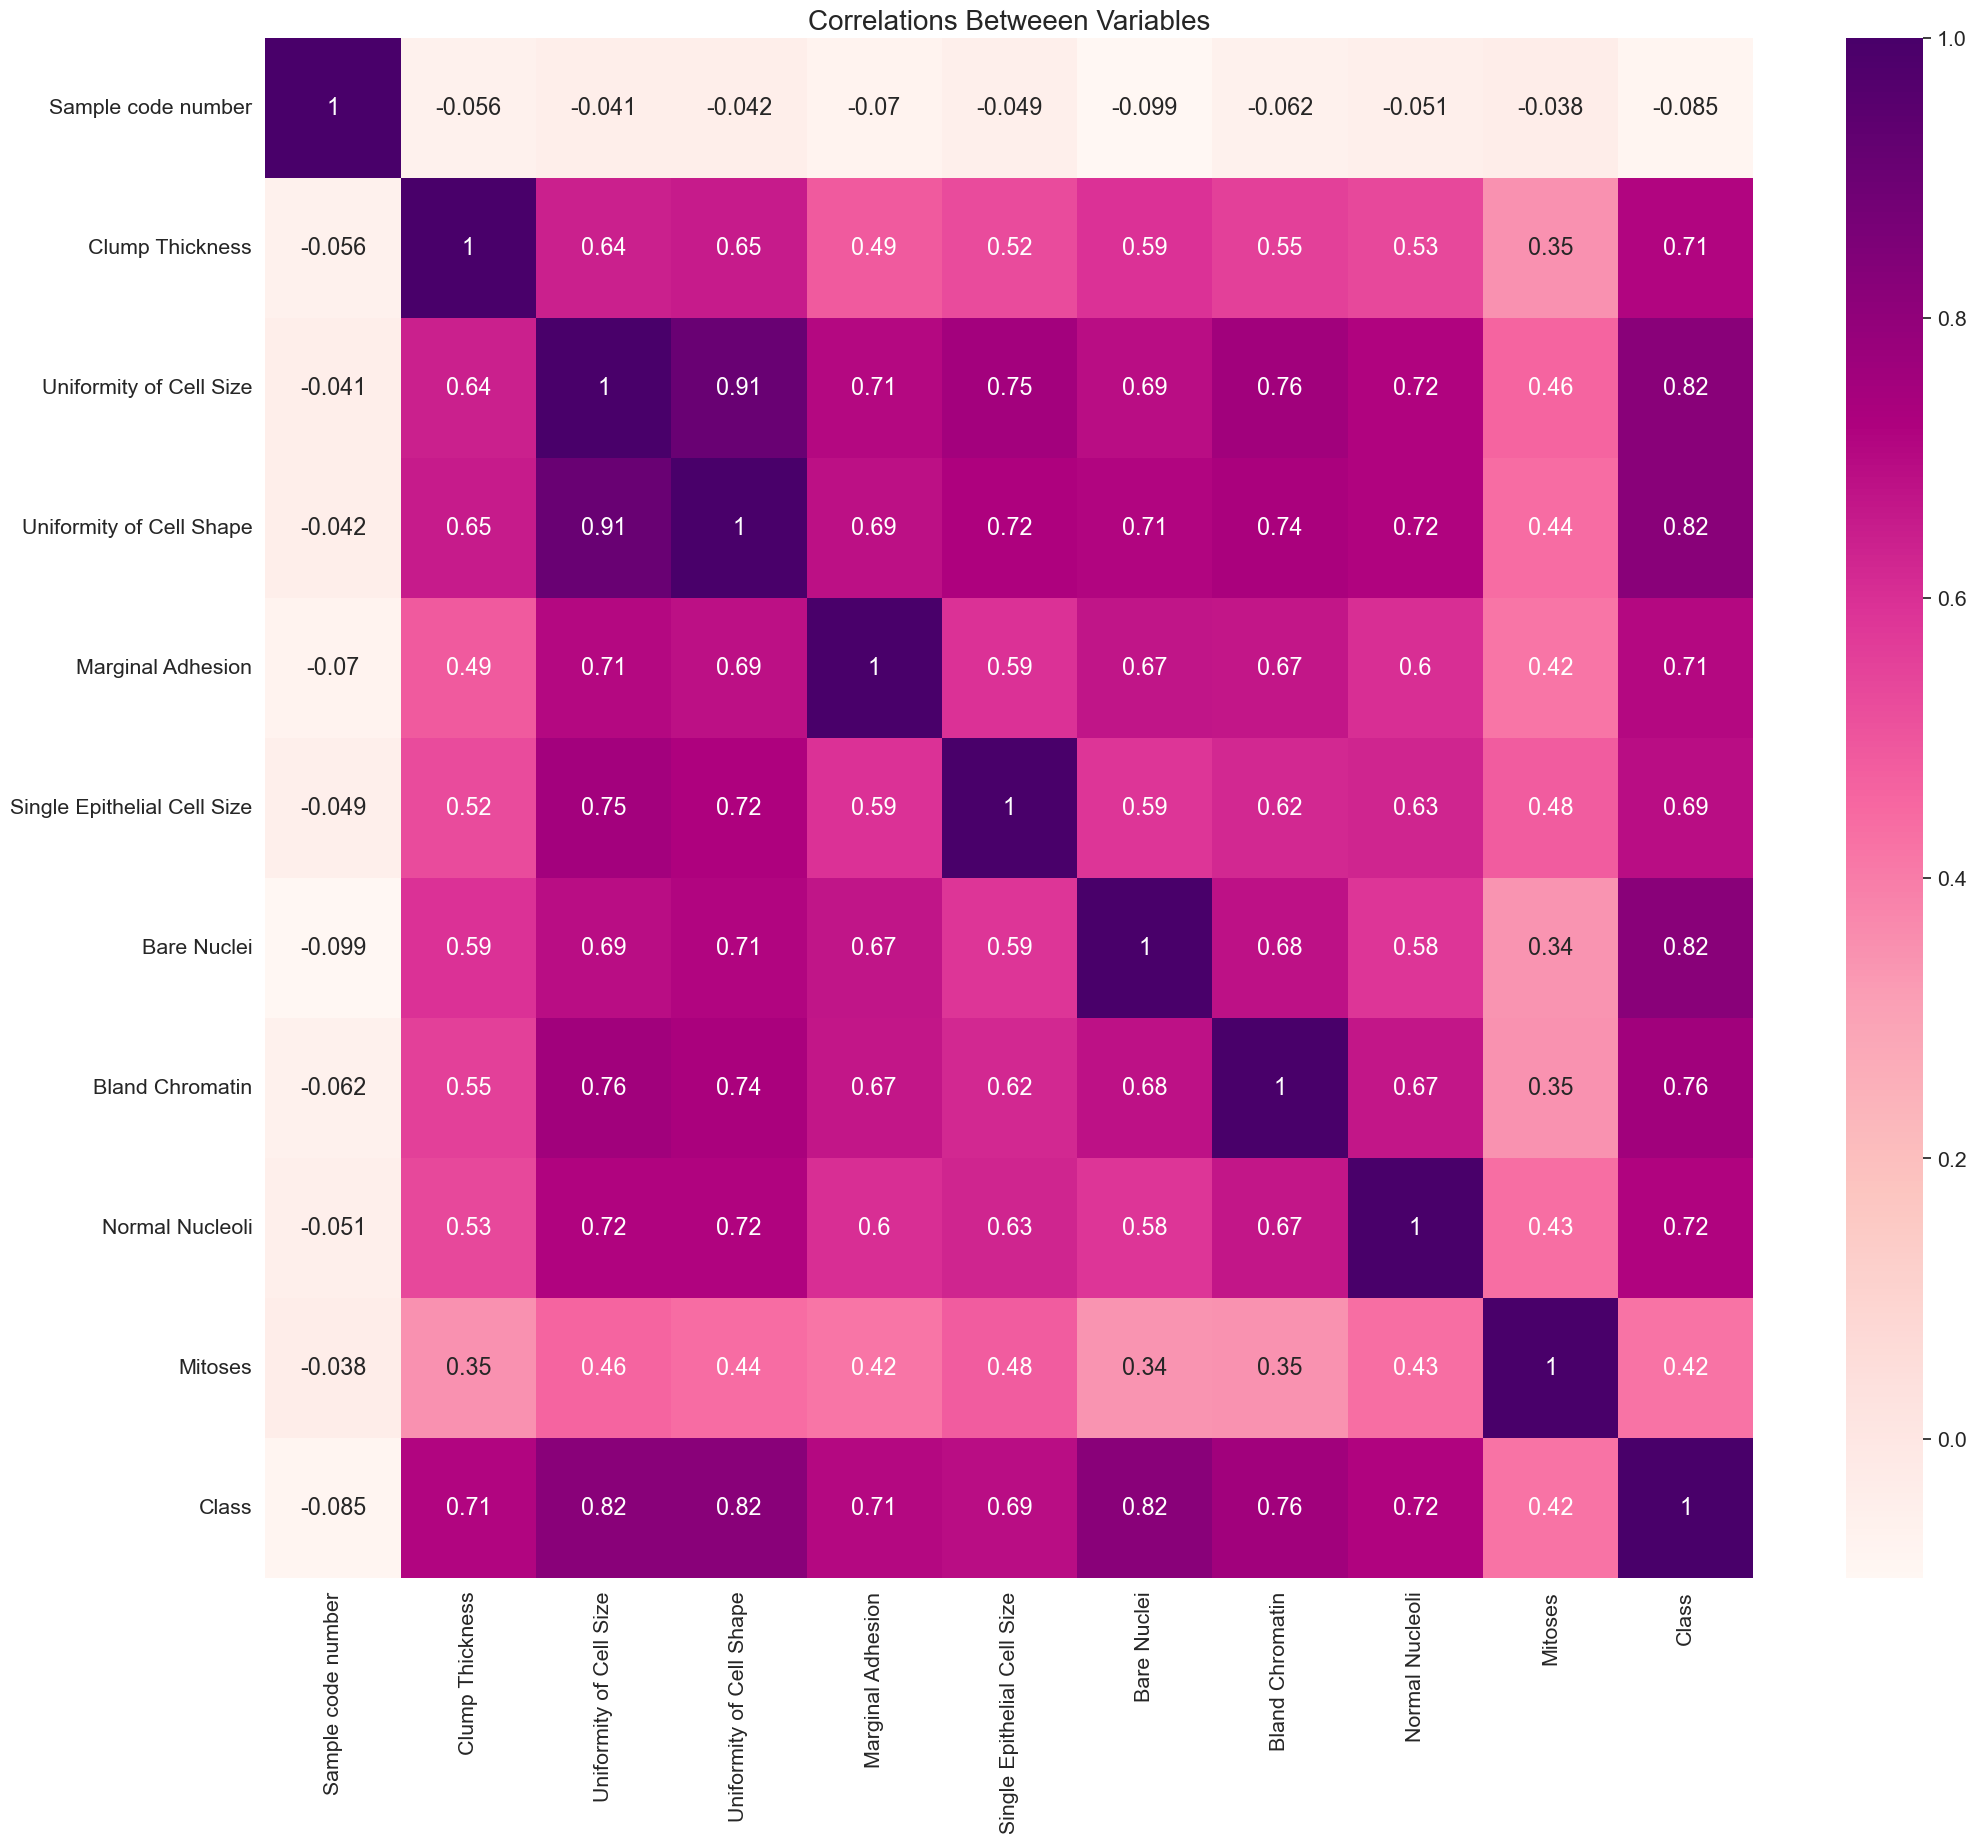

In [76]:
#Heatmap1
plt.figure(figsize=(24,20))
sns.set(font_scale=1.4)
sns.heatmap(data.corr(), annot=True, cmap="RdPu")
plt.title("Correlations Betweeen Variables", size=20)
plt.show()

C:\Users\sarif\AppData\Local\Temp\ipykernel_13808\3351285556.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


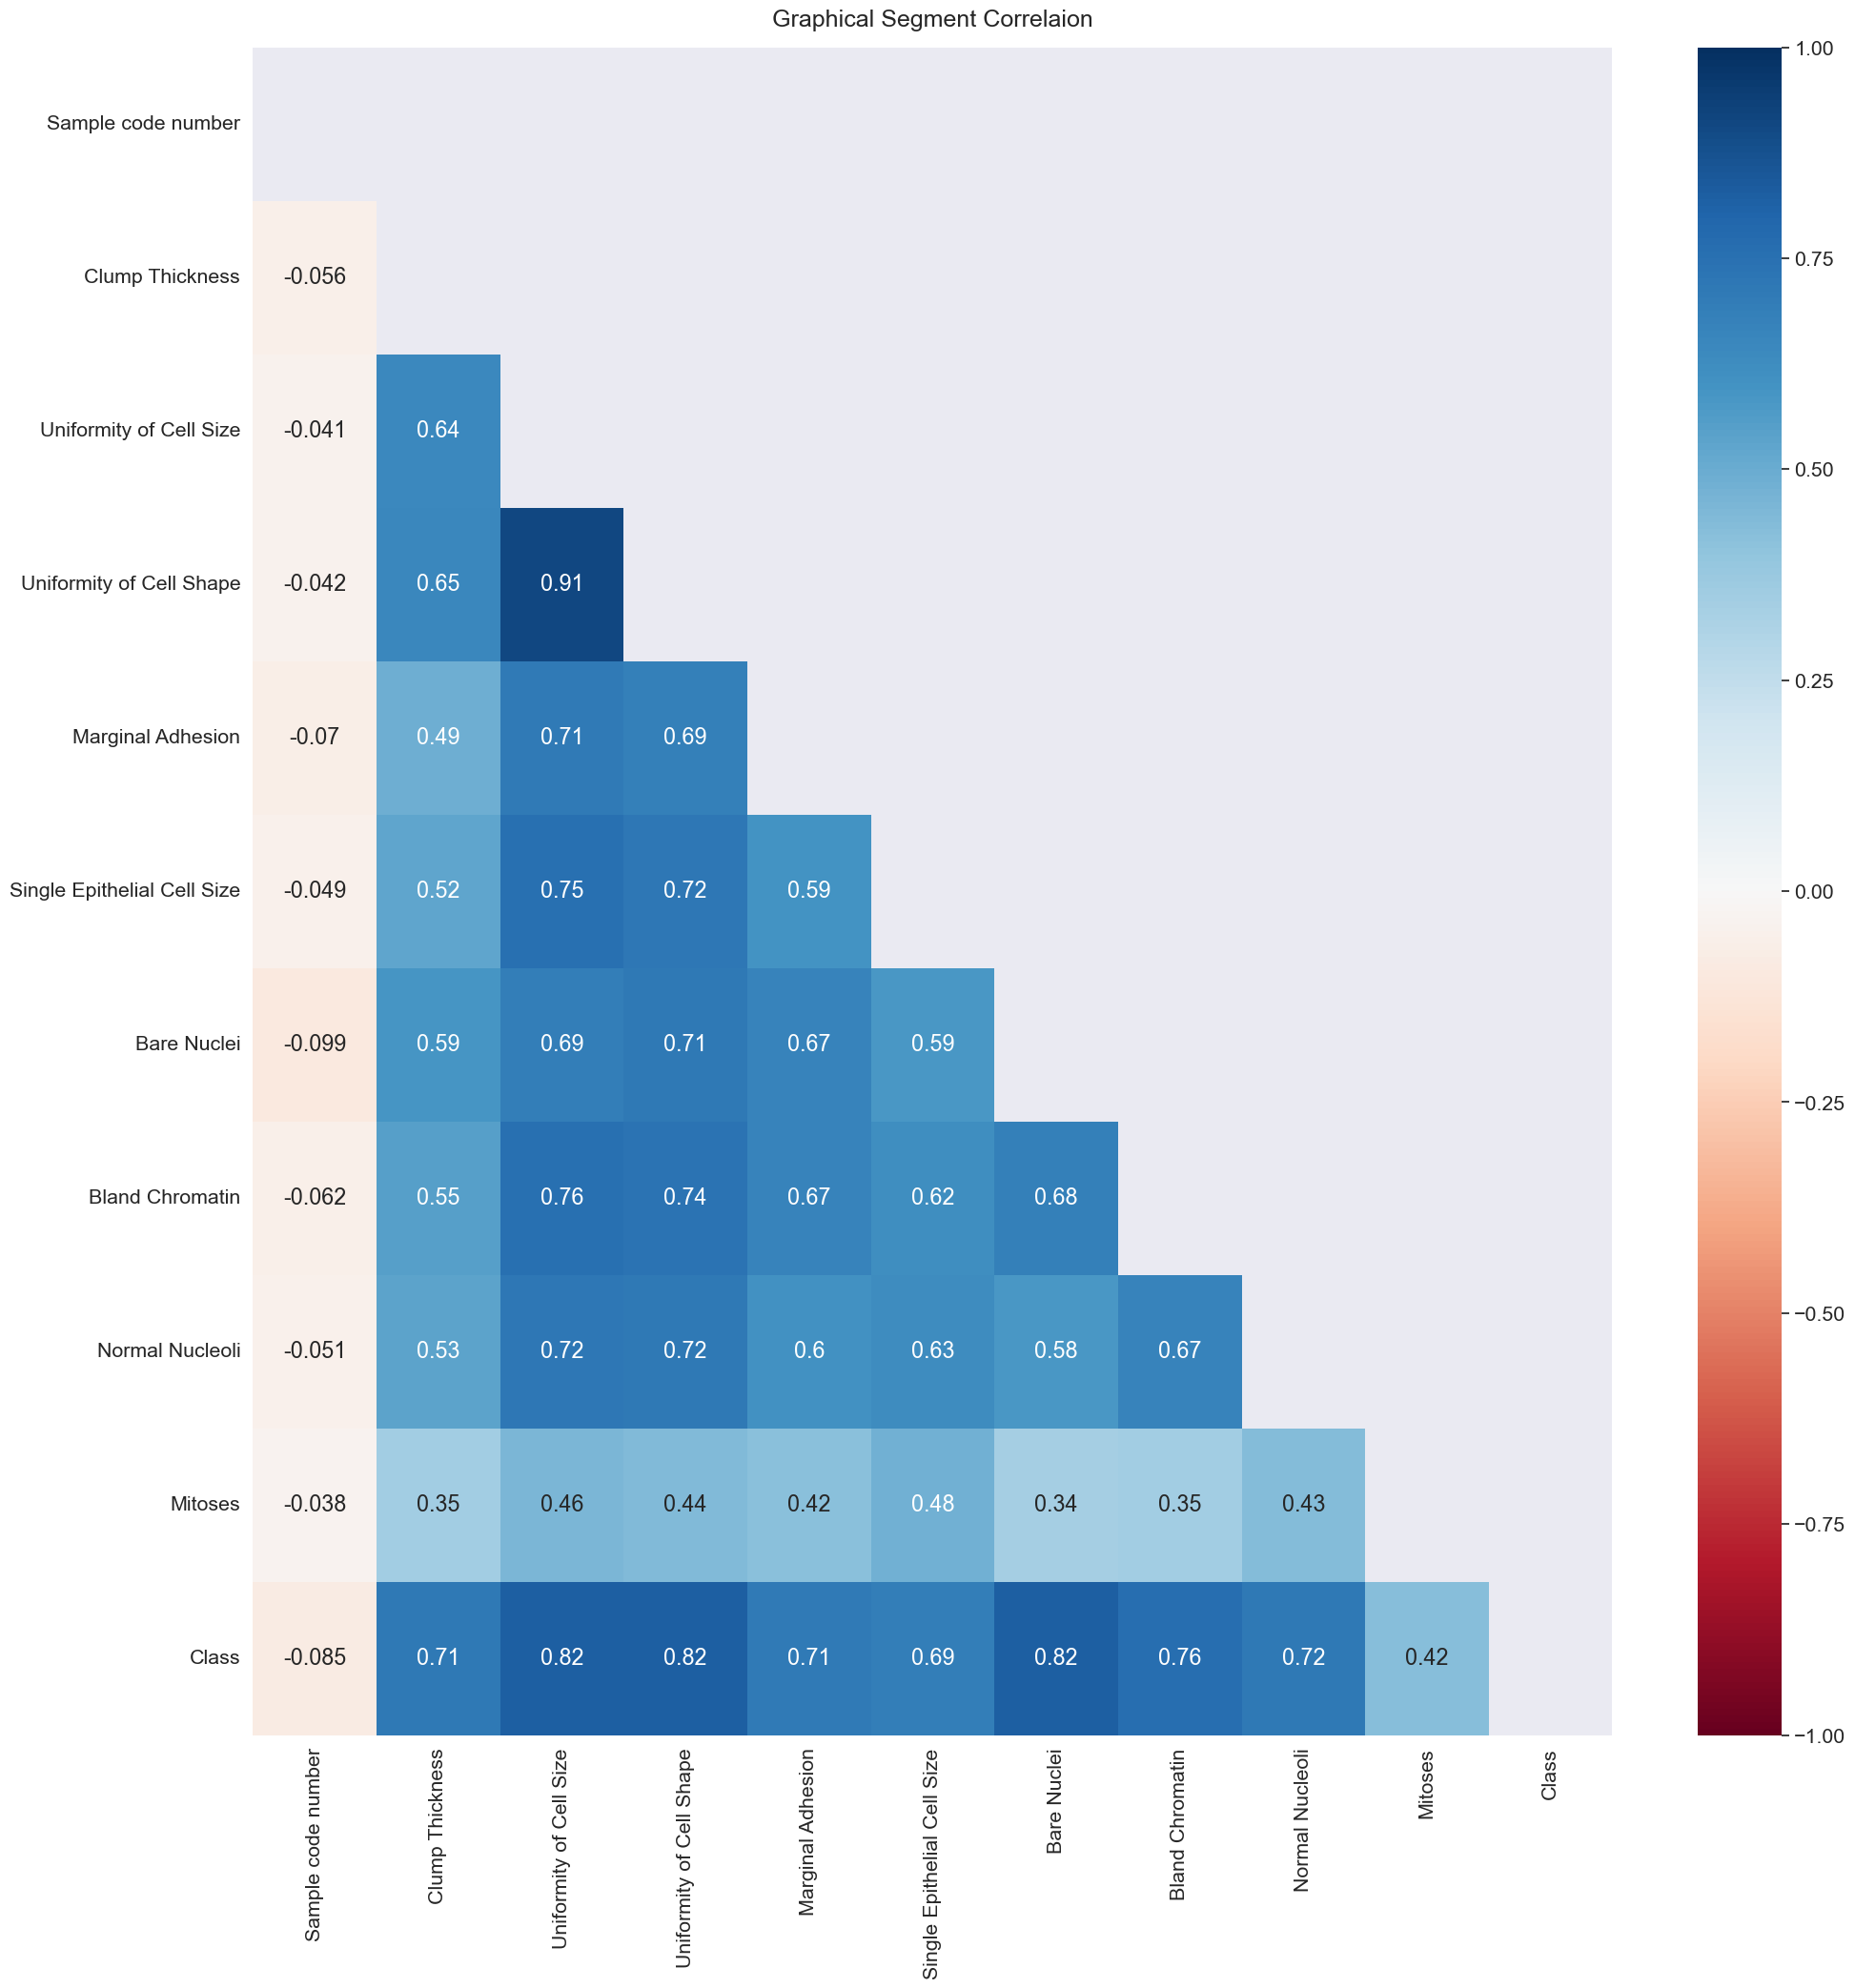

In [77]:
# Heatmap 2
corr = data.corr()
plt.figure(figsize=(23, 23))
sns.set(font_scale=1.4)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='RdBu')
heatmap.set_title('Graphical Segment Correlaion', fontdict={'fontsize':18}, pad=16);

**Comments:**

 - We created a correlation matrix and examined the most correlated variables. We can say that the correlation decreases from dark to light colors. 

 - For example, when we look at the one most related to Class, we see Uniformity of Cell Size and Uniformity of Cell Shape with 0.82.

Text(0.5, 1.0, 'Cell Shape vs Class')

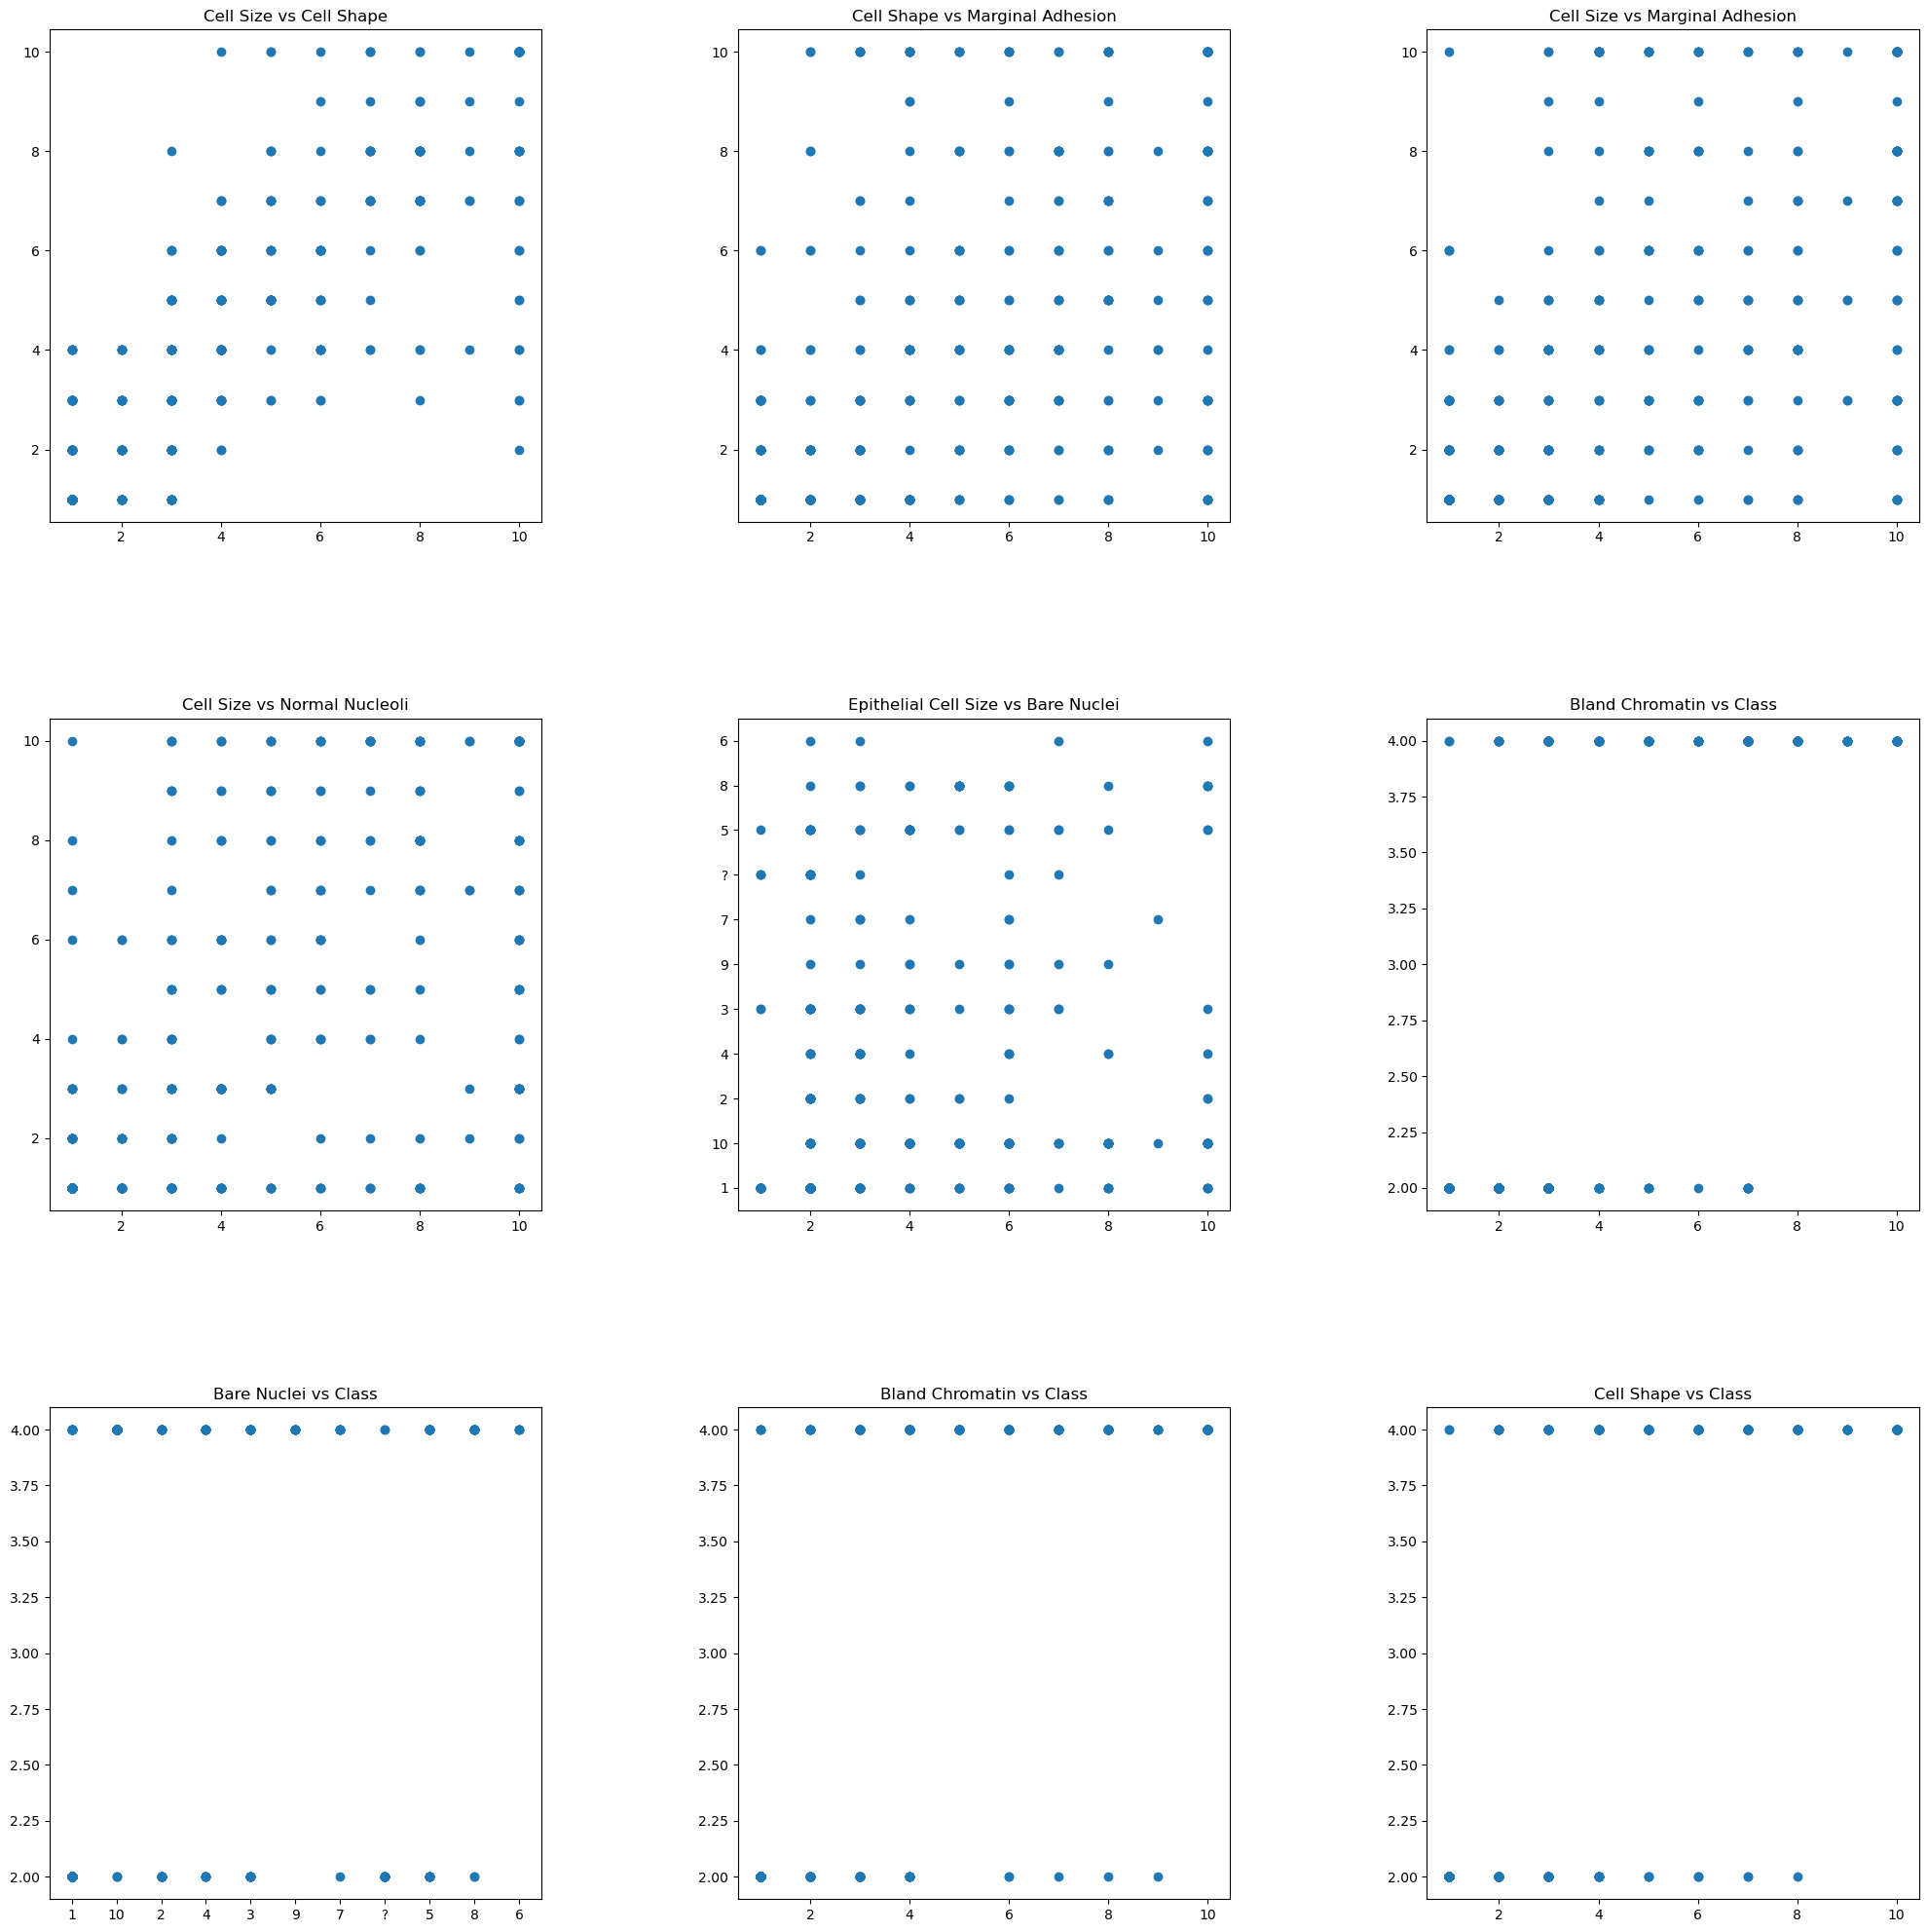

In [11]:
fig,axes = plt.subplots(3,3, figsize=(24,24))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

axes[0][0].scatter(data['Uniformity of Cell Size'],data['Uniformity of Cell Shape'])
axes[0][0].set_title("Cell Size vs Cell Shape")
axes[0][1].scatter(data['Uniformity of Cell Shape'],data['Marginal Adhesion'])
axes[0][1].set_title("Cell Shape vs Marginal Adhesion")
axes[0][2].scatter(data['Uniformity of Cell Size'],data['Marginal Adhesion'])
axes[0][2].set_title("Cell Size vs Marginal Adhesion")
axes[1][0].scatter(data['Uniformity of Cell Size'],data['Normal Nucleoli'])
axes[1][0].set_title("Cell Size vs Normal Nucleoli")
axes[1][1].scatter(data['Single Epithelial Cell Size'],data['Bare Nuclei'])
axes[1][1].set_title("Epithelial Cell Size vs Bare Nuclei")
axes[1][2].scatter(data['Bland Chromatin'],data['Class'])
axes[1][2].set_title("Bland Chromatin vs Class")
axes[2][0].scatter(data['Bare Nuclei'],data['Class'])
axes[2][0].set_title("Bare Nuclei vs Class")
axes[2][1].scatter(data['Uniformity of Cell Size'],data['Class'])
axes[2][1].set_title("Bland Chromatin vs Class")
axes[2][2].scatter(data['Uniformity of Cell Shape'],data['Class'])
axes[2][2].set_title("Cell Shape vs Class")

**Comments:**
 - When we look at the "Cell Size vs Cell Shape" graph, a linear relationship can be established between a and b, but it will not be a good model. For example, when we look at the situation where the value of Cell Size is 10, b takes 9 different values.
 - When we look at the "Bland Chromatin vs Class" graph, we cannot say that there is a clear relationship between them. However, if the "Bland Chromatin" value exceeds 8 and gets larger, the "Class" value will be 1. That is, cells with a "Bland Chromatin" value of 8 and greater than 8 are malignant. Similarly, Cell Shape greater than 8 means that the cell will alarm that it is malignant.

# --------------------------- Split the Data into Train and Test Data ----------------------------

In [54]:
X = data.drop(['Class'], axis=1)     #X = data.iloc[:,1:-1].values
y = data['Class']                    #y = data.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 556 to 559
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           512 non-null    int64
 1   Clump Thickness              512 non-null    int64
 2   Uniformity of Cell Size      512 non-null    int64
 3   Uniformity of Cell Shape     512 non-null    int64
 4   Marginal Adhesion            512 non-null    int64
 5   Single Epithelial Cell Size  512 non-null    int64
 6   Bare Nuclei                  512 non-null    int64
 7   Bland Chromatin              512 non-null    int64
 8   Normal Nucleoli              512 non-null    int64
 9   Mitoses                      512 non-null    int64
dtypes: int64(10)
memory usage: 44.0 KB


In [77]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# ----------------------------------------------- MODELS -----------------------------------------------

# 1 - SVM Model

In [99]:
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)

y_pred_train_SVM = clf_svm.predict(X_train)
roc_train_SVM=roc_auc_score(y_train,y_pred_train_SVM)
accuracy_train_SVM=accuracy_score(y_train, y_pred_train_SVM)
precision_train_SVM=precision_score(y_train, y_pred_train_SVM)
recall_train_SVM=recall_score(y_train, y_pred_train_SVM)
f1_train_SVM=f1_score(y_train, y_pred_train_SVM)
print("Train ROC Score is",roc_train_SVM)
print("Accuracy score is ",accuracy_train_SVM)
print("Precision score is ",precision_train_SVM)
print("Recall score is ",recall_train_SVM)
print("f1 score is ",f1_train_SVM)

Train ROC Score is 0.9781856718948706
Accuracy score is  0.978515625
Precision score is  0.9606741573033708
Recall score is  0.9771428571428571
f1 score is  0.9688385269121813


In [100]:
y_pred_test_SVM = clf_svm.predict(X_test)
roc_test_SVM=roc_auc_score(y_test,y_pred_test_SVM)
accuracy_test_SVM=accuracy_score(y_test, y_pred_test_SVM)
precision_test_SVM=precision_score(y_test, y_pred_test_SVM)
recall_test_SVM=recall_score(y_test, y_pred_test_SVM)
f1_test_SVM=f1_score(y_test, y_pred_test_SVM)

print("Test ROC Score is",roc_test_SVM)
print("Accuracy score is ",accuracy_test_SVM)
print("Precision score is ",precision_test_SVM)
print("Recall score is ",recall_test_SVM)
print("f1 score is ",f1_test_SVM)

Test ROC Score is 0.9485251168224299
Accuracy score is  0.9473684210526315
Precision score is  0.9104477611940298
Recall score is  0.953125
f1 score is  0.931297709923664


In [101]:
cm_test_SVM = confusion_matrix(y_test, y_pred_test_SVM)
cm_test_SVM

array([[101,   6],
       [  3,  61]], dtype=int64)

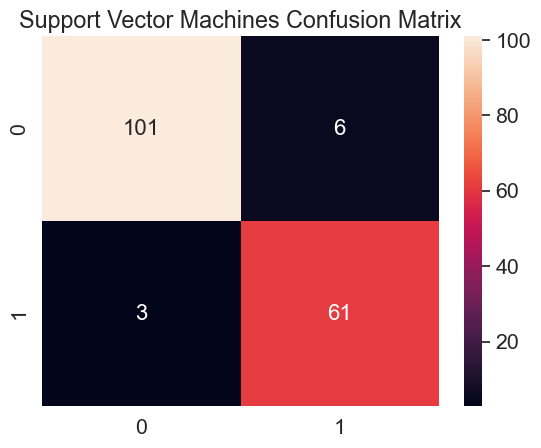

In [102]:
sns.set(font_scale=1.4)
sns.heatmap(cm_test_SVM, annot=True, annot_kws={"size": 16}, fmt='g')
plt.title('Support Vector Machines Confusion Matrix')
plt.show()

In [103]:
accuracy_SVM = cross_val_score(estimator = clf_svm, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracy_SVM.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracy_SVM.std()*100))

Accuracy: 97.07 %
Standard Deviation: 2.18 %


# 2 - Naive Bayes Model

In [104]:
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

y_pred_train_NB = classifier_NB.predict(X_train)
roc_train_NB=roc_auc_score(y_train,y_pred_train_NB)
accuracy_train_NB=accuracy_score(y_train, y_pred_train_NB)
precision_train_NB=precision_score(y_train, y_pred_train_NB)
recall_train_NB=recall_score(y_train, y_pred_train_NB)
f1_train_NB=f1_score(y_train, y_pred_train_NB)

print("Train ROC Score is",roc_train_NB)
print("Accuracy score is ",accuracy_train_NB)
print("Precision score is ",precision_train_NB)
print("Recall score is ",recall_train_NB)
print("f1 score is ",f1_train_NB)

Train ROC Score is 0.9721407376006782
Accuracy score is  0.96875
Precision score is  0.9297297297297298
Recall score is  0.9828571428571429
f1 score is  0.9555555555555555


In [105]:
y_pred_test_NB = classifier_NB.predict(X_test)
roc_test_NB=roc_auc_score(y_test,y_pred_test_NB)
accuracy_test_NB=accuracy_score(y_test, y_pred_test_NB)
precision_test_NB=precision_score(y_test, y_pred_test_NB)
recall_test_NB=recall_score(y_test, y_pred_test_NB)
f1_test_NB=f1_score(y_test, y_pred_test_NB)

print("Test ROC Score is",roc_test_NB)
print("Accuracy score is ",accuracy_test_NB)
print("Precision score is ",precision_test_NB)
print("Recall score is ",recall_test_NB)
print("f1 score is ",f1_test_NB)

Test ROC Score is 0.9438522196261682
Accuracy score is  0.9415204678362573
Precision score is  0.8970588235294118
Recall score is  0.953125
f1 score is  0.9242424242424244


In [106]:
cm_test_NB = confusion_matrix(y_test, y_pred_test_NB)
cm_test_NB

array([[100,   7],
       [  3,  61]], dtype=int64)

In [107]:
accuracy_NB = cross_val_score(estimator = classifier_NB, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracy_NB.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracy_NB.std()*100))

Accuracy: 96.88 %
Standard Deviation: 2.17 %


# 3 - Logistic Regression Model

In [108]:
classifier_LR = LogisticRegression()
classifier_LR.fit(X_train, y_train)

y_pred_train_LR = classifier_LR.predict(X_train)
roc_train_LR=roc_auc_score(y_train,y_pred_train_LR)
accuracy_train_LR=accuracy_score(y_train, y_pred_train_LR)
precision_train_LR=precision_score(y_train, y_pred_train_LR)
recall_train_LR=recall_score(y_train, y_pred_train_LR)
f1_train_LR=f1_score(y_train, y_pred_train_LR)

print("Train ROC Score is",roc_train_LR)
print("Accuracy score is ",accuracy_train_LR)
print("Precision score is ",precision_train_LR)
print("Recall score is ",recall_train_LR)
print("f1 score is ",f1_train_LR)

Train ROC Score is 0.978295888088173
Accuracy score is  0.98046875
Precision score is  0.9714285714285714
Recall score is  0.9714285714285714
f1 score is  0.9714285714285714


In [109]:
y_pred_test_LR = classifier_LR.predict(X_test)
roc_test_LR=roc_auc_score(y_test,y_pred_test_LR)
accuracy_test_LR=accuracy_score(y_test, y_pred_test_LR)
precision_test_LR=precision_score(y_test, y_pred_test_LR)
recall_test_LR=recall_score(y_test, y_pred_test_LR)
f1_test_LR=f1_score(y_test, y_pred_test_LR)

print("Test ROC Score is",roc_test_LR)
print("Accuracy score is ",accuracy_test_LR)
print("Precision score is ",precision_test_LR)
print("Recall score is ",recall_test_LR)
print("f1 score is ",f1_test_LR)
#print(np.concatenate((y_pred_test_LR.reshape(len(ypred_test_LR),1), y_test.reshape(len(y_test),1)),1))

Test ROC Score is 0.9422459112149533
Accuracy score is  0.9473684210526315
Precision score is  0.9365079365079365
Recall score is  0.921875
f1 score is  0.9291338582677166


In [110]:
cm_test_LR = confusion_matrix(y_test, y_pred_test_LR)
cm_test_LR

array([[103,   4],
       [  5,  59]], dtype=int64)

In [111]:
accuracy_LR = cross_val_score(estimator = classifier_LR, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracy_LR .mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracy_LR.std()*100))

Accuracy: 96.87 %
Standard Deviation: 1.57 %


# 4 - KNN Model

In [112]:
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_train, y_train)

y_pred_train_KNN = classifier_KNN.predict(X_train)
roc_train_KNN=roc_auc_score(y_train,y_pred_train_KNN)
accuracy_train_KNN=accuracy_score(y_train, y_pred_train_KNN)
precision_train_KNN=precision_score(y_train, y_pred_train_KNN)
recall_train_KNN=recall_score(y_train, y_pred_train_KNN)
f1_train_KNN=f1_score(y_train, y_pred_train_KNN)

print("Train ROC Score is",roc_train_KNN)
print("Accuracy score is ",accuracy_train_KNN)
print("Precision score is ",precision_train_KNN)
print("Recall score is ",recall_train_KNN)
print("f1 score is ",f1_train_KNN)

Train ROC Score is 0.9739550657058076
Accuracy score is  0.9765625
Precision score is  0.9657142857142857
Recall score is  0.9657142857142857
f1 score is  0.9657142857142856


C:\Users\sarif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [113]:
y_pred_test_KNN = classifier_KNN.predict(X_test)
roc_test_KNN=roc_auc_score(y_test,y_pred_test_KNN)
accuracy_test_KNN=accuracy_score(y_test, y_pred_test_KNN)
precision_test_KNN=precision_score(y_test, y_pred_test_KNN)
recall_test_KNN=recall_score(y_test, y_pred_test_KNN)
f1_test_KNN=f1_score(y_test, y_pred_test_KNN)

print("Test ROC Score is",roc_test_KNN)
print("Accuracy score is ",accuracy_test_KNN)
print("Precision score is ",precision_test_KNN)
print("Recall score is ",recall_test_KNN)
print("f1 score is ",f1_test_KNN)

Test ROC Score is 0.9375730140186915
Accuracy score is  0.9415204678362573
Precision score is  0.921875
Recall score is  0.921875
f1 score is  0.921875


C:\Users\sarif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [114]:
cm_test_KNN = confusion_matrix(y_test, y_pred_test_KNN)
cm_test_KNN

array([[102,   5],
       [  5,  59]], dtype=int64)

In [115]:
accuracy_KNN = cross_val_score(estimator = classifier_KNN, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracy_KNN.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracy_KNN.std()*100))

Accuracy: 97.46 %
Standard Deviation: 2.14 %


C:\Users\sarif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sarif\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

# -------------------------------------------- RESULTS --------------------------------------------

| Models           |Test ROC Score |Accuracy Score |Precision Score |Recall score |F1 Score |Cross Val Score  |Conf. Matrix  |
|------------------|---------------|---------------|----------------|-------------|---------|-----------------|--------------|
| SVM Model        | **0.948525**      | **0.947368**      | 0.910478       | **0.953125**    |**0.931298** |97.07% - Standart Deviation:2.18%|**[101,6], [3,61]**|
| N. Bayes Model   | 0.943852      | 0.941520      | 0.897059       | **0.953125**    |0.924242 |96.88% - Standart Deviation:2.17%|[100,7], [3,61]|
| Log. Regr. Model | 0.942246      | **0.947368**      | **0.936508**       | 0.921875    |0.929134 |96.87% - Standart Deviation:**1.57%**|**[103,4], [5,59]**|
| KNN Model        | 0.937573      | 0.941520      | 0.921875       | 0.921875    |0.921875 |**97.46%** - Standart Deviation:2.14%|[102,5], [5,59]|

**Comparison between models**

We created the above table of the values we used to test the models. When we look at this table, we see that the SVM model shows the best performance. The second best model is the Logistic Regression model. The KNN model has the highest Cross Value Score.

However, each model can be used for this classification process.